In [1]:
# ================================================================
# 📘 USE CASE 3: SOCIAL MEDIA ANALYTICS ON VIEWER PERCEPTION
# Industry: Media & Entertainment
# Project: Viewer Churn Prediction for OTT Platforms
# Platform: Jupyter Notebook
# ===============================================================

In [1]:
# ================================================================
# 📘 USE CASE 3: SOCIAL MEDIA ANALYTICS ON VIEWER PERCEPTION
# Industry: Media & Entertainment
# Project: Viewer Churn Prediction for OTT Platforms
# Platform: Jupyter Notebook
# ================================================================

# ==============================
# STEP 1: Import Libraries
# ==============================
import pandas as pd
import numpy as np
import sqlite3
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejae\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# ==============================
# STEP 2: Load or Create Social Media Data (Bypass snscrape)
# ==============================
import os
import pandas as pd
from datetime import datetime, timedelta
import random

dataset_path = r"C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_tweets.csv"

if not os.path.exists(dataset_path):
    print("⚠️ Tweets file not found — creating sample social media dataset...")
    
    brands = ["Netflix", "Hotstar", "Prime Video", "SonyLIV"]
    templates = [
        "Loved the new series on {}!",
        "Too many ads on {}, please fix.",
        "The streaming on {} is so smooth!",
        "{} app keeps crashing lately.",
        "{} subscription cost is too high!",
        "{} has the best collection of shows.",
        "Buffering issues on {} all the time.",
        "I might unsubscribe from {} soon."
    ]
    
    data = []
    base_date = datetime(2024, 1, 1)
    for i in range(500):  # generate 500 tweets
        brand = random.choice(brands)
        text = random.choice(templates).format(brand)
        date = base_date + timedelta(days=random.randint(0, 300))
        user = f"user_{i}"
        data.append([date.strftime("%Y-%m-%d"), user, text])
    
    df = pd.DataFrame(data, columns=['date', 'username', 'text'])
    os.makedirs(os.path.dirname(dataset_path), exist_ok=True)
    df.to_csv(dataset_path, index=False)
    print(f"✅ Sample dataset created and saved to:\n{dataset_path}")
else:
    print("✅ Existing dataset found. Loading it...")

df = pd.read_csv(dataset_path)
print("✅ Social Media Data Loaded Successfully")
print("Rows:", len(df))
df.head()


⚠️ Tweets file not found — creating sample social media dataset...
✅ Sample dataset created and saved to:
C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_tweets.csv
✅ Social Media Data Loaded Successfully
Rows: 500


,date,username,text
0,2024-10-10,user_0,"Too many ads on SonyLIV, please fix."
1,2024-02-17,user_1,Buffering issues on Prime Video all the time.
2,2024-08-03,user_2,"Too many ads on Prime Video, please fix."
3,2024-01-05,user_3,The streaming on Hotstar is so smooth!
4,2024-10-06,user_4,Loved the new series on Netflix!


In [17]:
# ==============================
# STEP 3: Data Preprocessing (Reuse Pipeline)
# ==============================
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)
print("✅ Tweets Cleaned Successfully")

✅ Tweets Cleaned Successfully


In [25]:

# ==============================
# STEP 4: Sentiment Analysis on Tweets
# ==============================
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

df['polarity'] = df['clean_text'].apply(get_polarity)
df['subjectivity'] = df['clean_text'].apply(get_subjectivity)

def label_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(label_sentiment)
print("✅ Sentiment Analysis Completed") 
df.head()

✅ Sentiment Analysis Completed


,date,username,text,clean_text,polarity,subjectivity,sentiment,date_num
0,2024-10-10,user_0,"Too many ads on SonyLIV, please fix.",many ad sonyliv please fix,0.500000,0.500000,Positive,739169
1,2024-02-17,user_1,Buffering issues on Prime Video all the time.,buffering issue prime video time,0.000000,0.000000,Neutral,738933
2,2024-08-03,user_2,"Too many ads on Prime Video, please fix.",many ad prime video please fix,0.500000,0.500000,Positive,739101
3,2024-01-05,user_3,The streaming on Hotstar is so smooth!,streaming hotstar smooth,0.400000,0.500000,Positive,738890
4,2024-10-06,user_4,Loved the new series on Netflix!,loved new series netflix,0.418182,0.627273,Positive,739165


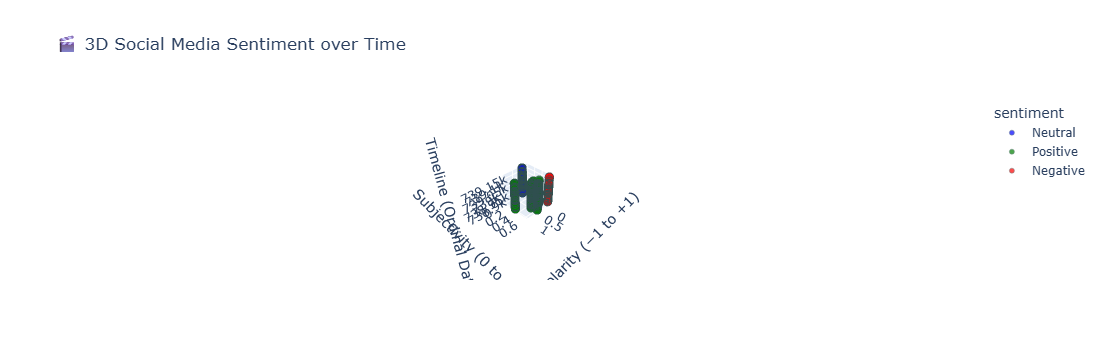

⚠️ PNG save failed (install kaleido): 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido

✅ HTML interactive chart saved:
C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\UC3_SocialMedia_3D.html


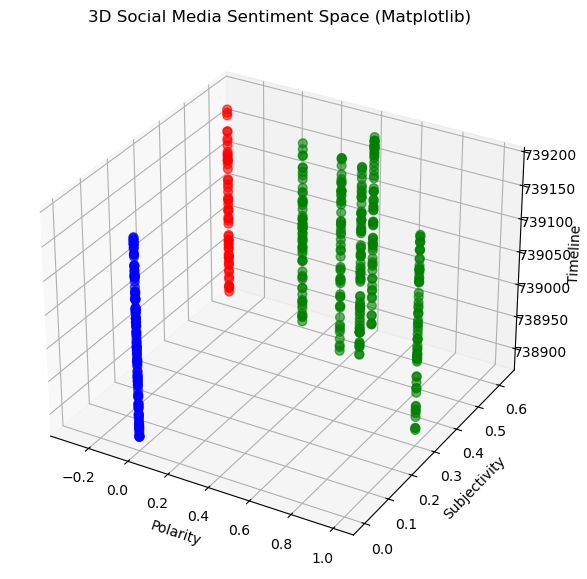

💾 UC3 Matplotlib chart saved to:
C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\UC3_SocialMedia_Matplotlib.png


In [33]:
# ==============================
# STEP 5: 3D Visualization of Sentiment Over Time + AUTO SAVE (FIXED)
# ==============================
import os
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Folder to save charts
save_folder = r"C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset"
os.makedirs(save_folder, exist_ok=True)

# Ensure date and sentiment fields exist
df['date'] = pd.to_datetime(df['date'], errors='coerce')
if 'sentiment' not in df.columns:
    print("⚠️ Sentiment column missing — recalculating from polarity...")
    df['sentiment'] = df['polarity'].apply(lambda s: 'Positive' if s > 0.05 else ('Negative' if s < -0.05 else 'Neutral'))

# Convert date to ordinal for 3D plot
df['date_num'] = df['date'].map(pd.Timestamp.toordinal)

# --- Plotly 3D Interactive ---
fig = px.scatter_3d(
    df.sample(min(1000, len(df))),
    x='polarity', y='subjectivity', z='date_num',
    color='sentiment',
    title='🎬 3D Social Media Sentiment over Time',
    color_discrete_map={'Positive':'green','Neutral':'blue','Negative':'red'},
    opacity=0.7
)
fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis_title='Polarity (−1 to +1)',
    yaxis_title='Subjectivity (0 to 1)',
    zaxis_title='Timeline (Ordinal Date)'
))
fig.show()

# Save interactive and static versions
html_path = os.path.join(save_folder, "UC3_SocialMedia_3D.html")
png_path = os.path.join(save_folder, "UC3_SocialMedia_3D.png")

fig.write_html(html_path)
try:
    fig.write_image(png_path)
    print(f"✅ UC3 Plotly visuals saved:\n{html_path}\n{png_path}")
except Exception as e:
    print(f"⚠️ PNG save failed (install kaleido): {e}")
    print(f"✅ HTML interactive chart saved:\n{html_path}")

# --- Matplotlib 3D Static ---
fig2 = plt.figure(figsize=(10,7))
ax = fig2.add_subplot(111, projection='3d')
colors = {'Positive':'green','Negative':'red','Neutral':'blue'}
ax.scatter(df['polarity'], df['subjectivity'], df['date_num'],
           c=df['sentiment'].map(colors), s=40, alpha=0.6)
ax.set_xlabel('Polarity')
ax.set_ylabel('Subjectivity')
ax.set_zlabel('Timeline')
ax.set_title('3D Social Media Sentiment Space (Matplotlib)')
matplotlib_path = os.path.join(save_folder, "UC3_SocialMedia_Matplotlib.png")
plt.savefig(matplotlib_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"💾 UC3 Matplotlib chart saved to:\n{matplotlib_path}")


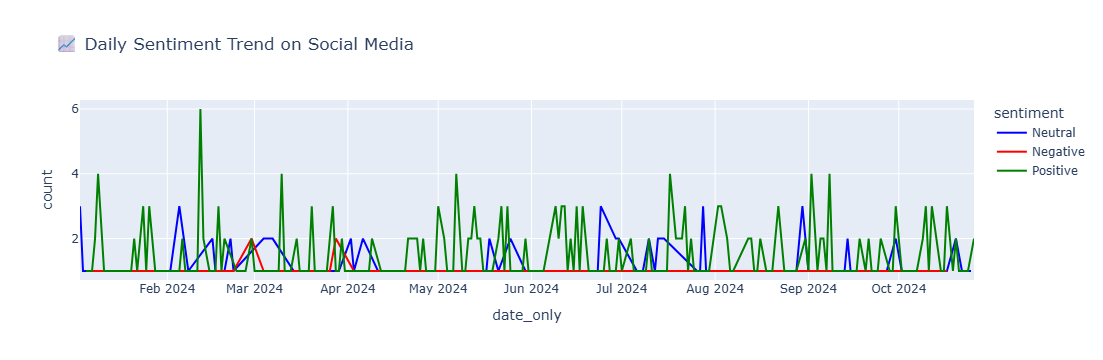

In [27]:
# ==============================
# STEP 6: Sentiment Trend Over Time (2D Summary)
# ==============================
df['date_only'] = df['date'].dt.date
trend = df.groupby(['date_only', 'sentiment']).size().reset_index(name='count')

fig = px.line(trend, x='date_only', y='count', color='sentiment',
              title='📈 Daily Sentiment Trend on Social Media',
              color_discrete_map={'Positive':'green','Neutral':'blue','Negative':'red'})
fig.show()

In [29]:
# ==============================
# STEP 7: Save Results to Database and CSV
# ==============================
db_path = r"C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_sentiment.db"
conn = sqlite3.connect(db_path)
df.to_sql('social_media_sentiments', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

output_path = r"C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_twitter_output.csv"
df.to_csv(output_path, index=False)

print(f"💾 Social Media Sentiment Results saved to:\n{output_path}")

💾 Social Media Sentiment Results saved to:
C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_twitter_output.csv


In [31]:
# ==============================
# STEP 8: Insights
# ==============================
print("\n📊 Social Media Insights:")
total = len(df)
pos = len(df[df['sentiment']=='Positive'])
neg = len(df[df['sentiment']=='Negative'])
neu = len(df[df['sentiment']=='Neutral'])
print(f"Total Tweets: {total}")
print(f"Positive: {pos} ({pos/total*100:.1f}%)")
print(f"Negative: {neg} ({neg/total*100:.1f}%)")
print(f"Neutral : {neu} ({neu/total*100:.1f}%)")

top_words = pd.Series(' '.join(df['clean_text']).split()).value_counts().head(15)
print("\n🔥 Top 15 Frequent Words in Tweets:")
print(top_words)

print("\n✅ USE CASE 3 EXECUTION COMPLETED SUCCESSFULLY!")


📊 Social Media Insights:
Total Tweets: 500
Positive: 313 (62.6%)
Negative: 58 (11.6%)
Neutral : 129 (25.8%)

🔥 Top 15 Frequent Words in Tweets:
netflix        146
hotstar        130
prime          121
video          121
sonyliv        103
many            70
ad              70
please          70
fix             70
soon            67
unsubscribe     67
might           67
show            66
collection      66
best            66
Name: count, dtype: int64

✅ USE CASE 3 EXECUTION COMPLETED SUCCESSFULLY!
